In [54]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy import stats
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [55]:
#read in the data
df = pd.read_csv("round_1_2_all_antagonist_data.csv", index_col=0)  # Set the first column as row index
#df = pd.read_csv("rounds_1_and_2_data_condensed_and_normalized.csv")

In [56]:
df

,Replicate 1,Replicate 2,Replicate 3,Replicate 4,Type
Treatment,,,,,
OxA,0.700662,1.613499,0.705137,0.980703,ctrl+
DMSO,0.073832,0.085019,0.066002,0.052205,ctrl-
7828,1.015009,0.462758,1.045959,0.378111,3
3749,1.048942,1.106740,1.059383,1.066468,3
4573,1.262981,0.825207,1.048942,0.715578,3
...,...,...,...,...,...
2410,0.346204,0.310195,0.102457,NaN,2
1949,0.419499,0.337927,0.176757,NaN,2
6891,0.411376,0.320136,0.011449,NaN,2


In [57]:
#already normalized
#row_mean = df.loc["OxA"].mean()
#df = df / df.loc["OxA"].mean()


In [58]:
#get mean and std dev
#row_means = df.mean(axis=1)  # Mean of each row
#row_stds = df.std(axis=1)    # Standard deviation of each row
row_means = df[['Replicate 1', 'Replicate 2', 'Replicate 3', 'Replicate 4']].mean(axis=1)  # Mean of each row
row_stds = df[['Replicate 1', 'Replicate 2', 'Replicate 3', 'Replicate 4']].std(axis=1)    # Standard deviation of each row

/tmp/ipykernel_1755101/2728001326.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


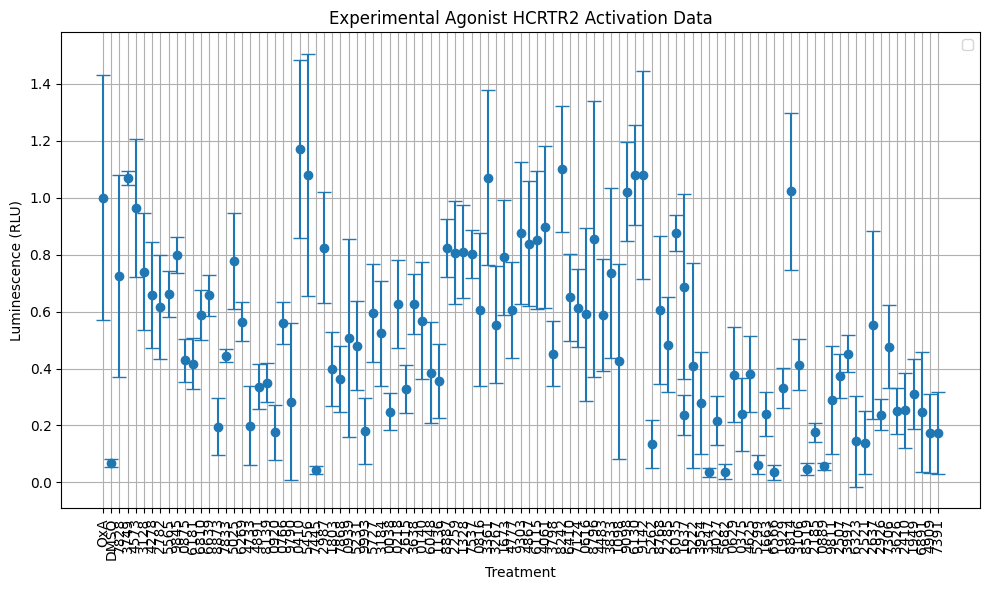

In [59]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(row_means.index, row_means, yerr=row_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Step 1: Load the data
drug_data = pd.read_csv("round_1_2_all_antagonist_data.csv")

#drug_data.iloc[:, 1:5] = drug_data.iloc[:, 1:5] / row_mean

#drop the drug 19 data since it is bad and the drug sucked anyway
#drug_data = drug_data[drug_data['Treatment'] != '3580']

drug_data

,Treatment,Replicate 1,Replicate 2,Replicate 3,Replicate 4,Type
0,OxA,0.700662,1.613499,0.705137,0.980703,ctrl+
1,DMSO,0.073832,0.085019,0.066002,0.052205,ctrl-
2,7828,1.015009,0.462758,1.045959,0.378111,3
3,3749,1.048942,1.106740,1.059383,1.066468,3
4,4573,1.262981,0.825207,1.048942,0.715578,3
...,...,...,...,...,...,...
99,2410,0.346204,0.310195,0.102457,NaN,2
100,1949,0.419499,0.337927,0.176757,NaN,2
101,6891,0.411376,0.320136,0.011449,NaN,2
102,4909,0.261578,0.243747,0.013769,NaN,2


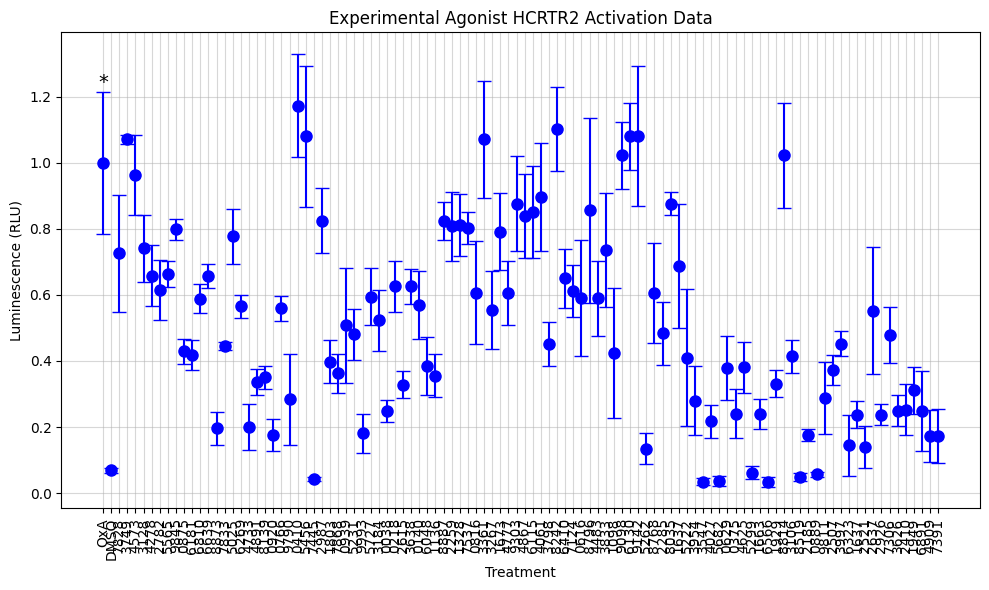

In [61]:
# Extract drug names (first column) and replicates (columns 2-5)
drug_names = drug_data.iloc[:, 0]  # Drug names are in the first column
replicates = drug_data.iloc[:, 1:5]  # Columns 2-5 contain the replicates for each drug

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is the first row of replicates
#significantly different from dmso, not oxa
first_drug_values = replicates.iloc[1]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)
    #print(i,p_value,drug_values)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Plot the drugs with error bars
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color='blue'
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    #temporary removal of asterisks for what is being lebeled as signficantly different from DMSO
    if i > 1:
        continue
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

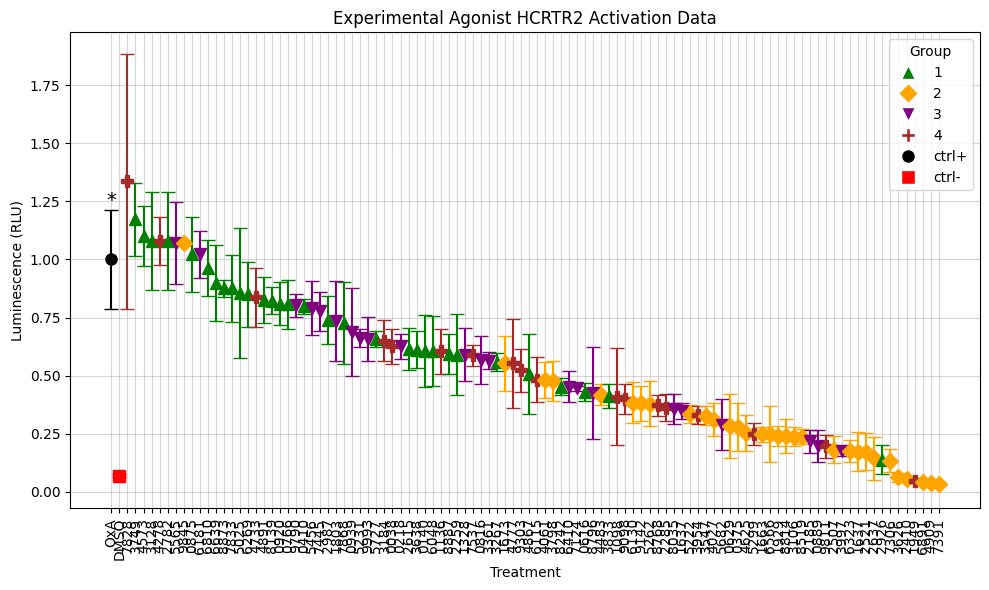

In [62]:
# Extract drug names (first column) and replicates (columns 2-5)
drug_names = drug_data.iloc[:, 0]  # Drug names are in the first column
replicates = drug_data.iloc[:, 1:5]  # Columns 2-5 contain the replicates for each drug
treatment_groups = drug_data.iloc[:, 5]

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows)

# Step 3: Combine into one DataFrame
summary_df = pd.DataFrame({
    'treatment': drug_names,
    'mean': drug_means,
    'sem': drug_sems,
    'group': treatment_groups
})

# Step 4: Apply custom sorting
oxa_row = summary_df[summary_df['treatment'] == 'OxA']
dmso_row = summary_df[summary_df['treatment'] == 'DMSO']
other_rows = summary_df[~summary_df['treatment'].isin(['OxA', 'DMSO'])]

# Sort the remaining treatments by descending mean
other_rows_sorted = other_rows.sort_values(by='mean', ascending=False)

# Concatenate in desired order
sorted_df = pd.concat([oxa_row, dmso_row, other_rows_sorted], ignore_index=True)

# Define distinct colors and markers for each group
group_to_color = {
    "ctrl+": "black",
    "ctrl-": "red",
    "1": "green",
    "2": "orange",
    "3": "purple",    # Optional for future use
    "4": "brown"      # Optional for future use
}

group_to_marker = {
    "ctrl+": "o",    # circle
    "ctrl-": "s",    # square
    "1": "^",        # triangle up
    "2": "D",        # diamond
    "3": "v",        # triangle down
    "4": "P"         # plus-filled
}


# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is the first row of replicates
#significantly different from dmso, not oxa
first_drug_values = replicates.iloc[1]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)
    #print(i,p_value,drug_values)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Plot the drugs with error bars
for i, (name, group) in enumerate(zip(sorted_names, sorted_df['group'])):
    color = group_to_color.get(group, "gray")  # fallback color
    marker = group_to_marker.get(group, "x")   # fallback marker
    plt.errorbar(
        [i], sorted_means[i], yerr=sorted_sems[i],
        fmt=marker, color=color, capsize=5, markersize=8, label=group if i == 0 else "",
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    #temporary removal of asterisks for what is being lebeled as signficantly different from DMSO
    if i > 1:
        continue
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

        
# Custom legend
from matplotlib.lines import Line2D

legend_elements = []
for group in sorted(set(sorted_df['group'])):
    color = group_to_color.get(group, "gray")
    marker = group_to_marker.get(group, "x")
    legend_elements.append(Line2D([0], [0], marker=marker, color='w', label=group,
                                  markerfacecolor=color, markersize=10))

plt.legend(handles=legend_elements, title="Group")
        
# Customize the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

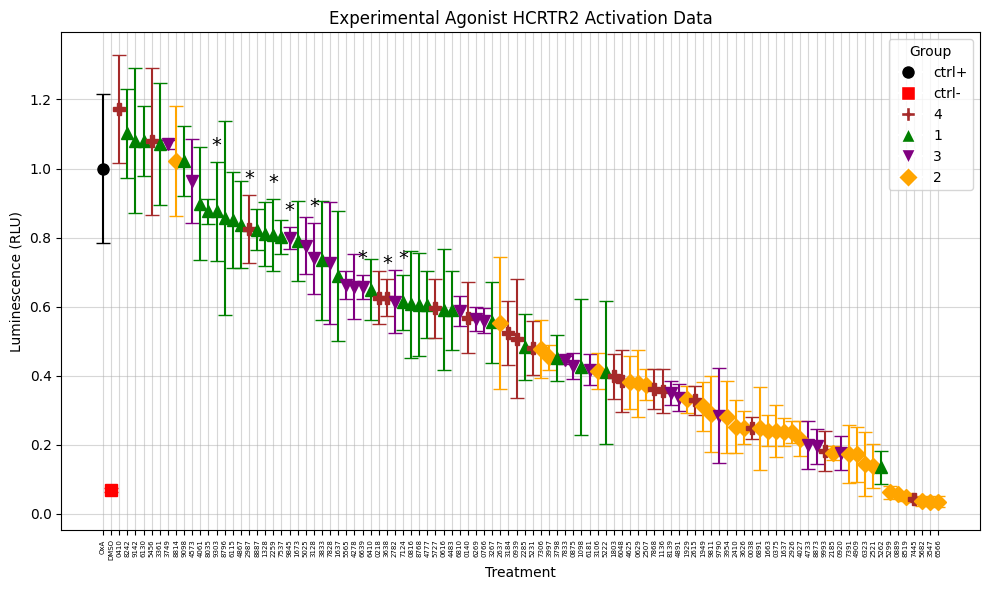

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D

# --- Step 1: Extract from original DataFrame ---
drug_names = drug_data.iloc[:, 0]
replicates = drug_data.iloc[:, 1:5]
treatment_groups = drug_data.iloc[:, 5]

# --- Step 2: Calculate summary stats ---
drug_means = replicates.mean(axis=1)
drug_sems = replicates.sem(axis=1)

# --- Step 3: Combine into one summary DataFrame ---
summary_df = pd.DataFrame({
    'treatment': drug_names,
    'mean': drug_means,
    'sem': drug_sems,
    'group': treatment_groups
})

# --- Step 4: Sort OxA → DMSO → others by descending mean ---
oxa_row = summary_df[summary_df['treatment'] == 'OxA']
dmso_row = summary_df[summary_df['treatment'] == 'DMSO']
other_rows = summary_df[~summary_df['treatment'].isin(['OxA', 'DMSO'])]
other_rows_sorted = other_rows.sort_values(by='mean', ascending=False)

sorted_df = pd.concat([oxa_row, dmso_row, other_rows_sorted], ignore_index=True)

# --- Step 5: Reorder replicates to match sorted_df ---
sorted_replicates = replicates.loc[sorted_df.index].reset_index(drop=True)
sorted_names = sorted_df['treatment'].values
sorted_means = sorted_df['mean'].values
sorted_sems = sorted_df['sem'].values
sorted_groups = sorted_df['group'].values

# --- Step 6: Perform statistical analysis against DMSO (index 1) ---
reference_values = sorted_replicates.iloc[0]
p_values = []

for i in range(len(sorted_names)):
    drug_values = sorted_replicates.iloc[i]
    _, p_value = stats.ttest_ind(reference_values, drug_values, equal_var=False)
    p_values.append(p_value)

# --- Step 7: Define colors and markers ---
group_to_color = {
    "ctrl+": "black",
    "ctrl-": "red",
    "1": "green",
    "2": "orange",
    "3": "purple",
    "4": "brown"
}

group_to_marker = {
    "ctrl+": "o",
    "ctrl-": "s",
    "1": "^",
    "2": "D",
    "3": "v",
    "4": "P"
}

# --- Step 8: Plot ---
plt.figure(figsize=(10, 6))

for i, (name, group) in enumerate(zip(sorted_names, sorted_groups)):
    color = group_to_color.get(group, "gray")
    marker = group_to_marker.get(group, "x")
    plt.errorbar(
        [i], sorted_means[i], yerr=sorted_sems[i],
        fmt=marker, color=color, capsize=5, markersize=8
    )

# Add significance asterisks (skip OxA and DMSO: indices 0,1)
for i, p_value in enumerate(p_values):
    if i <= 1:
        continue
    if p_value < 0.05:
        plt.text(
            i, sorted_means[i] + sorted_sems[i] + 0.02, "*",
            ha="center", va="bottom", fontsize=14, color="black"
        )

# --- Step 9: Custom legend ---
legend_elements = []
seen_groups = set()
for group in sorted_groups:
    if group not in seen_groups:
        color = group_to_color.get(group, "gray")
        marker = group_to_marker.get(group, "x")
        legend_elements.append(Line2D([0], [0], marker=marker, color='w',
                                      label=group, markerfacecolor=color, markersize=10))
        seen_groups.add(group)

plt.legend(handles=legend_elements, title="Group")

# --- Final plot settings ---
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(sorted_names)), sorted_names, rotation=90, ha="center", fontsize=5)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
